# EXPLORATION_CR2 Iris의 세 가지 품종, 분류해볼 수 있겠어요?

## 학습 목표

-. scikit-learn에 내장된 예제 데이터셋의 종류를 알고 활용할 수 있다.

-. scikit-learn에 내장된 분류 모델들을 학습시키고 예측해 볼 수 있다.

-. 모델의 성능을 평가하는 지표의 종류에 대해 이해하고, 활용 및 확인해 볼 수 있다.

-. Decision Tree, XGBoost, RandomForest, 로지스틱 회귀 모델을 활용해서 간단하게 학습 및 예측해 볼 수 있다.

-. 데이터셋을 사용해서 스스로 분류 기초 실습을 진행할 수 있다.

## 학습 전제

-. scikit-learn을 활용해서 머신러닝을 시도해본 적이 없다.

-. scikit-learn에 내장된 분류 모델을 활용해본 적이 없다.

-. 지도학습의 분류 실습을 해 본 적이 없다.

-. 머신러닝 모델을 학습시켜보고, 그 성능을 평가해본 적이 없다.

## load_digits 데이터 모델학습

## (1) 필요한 모듈 import 및 데이터 준비

In [1]:
import sklearn
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## (2) 데이터 이해

### -. Feature Data 지정

In [2]:
digits = load_digits()

print(dir(digits))

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


In [3]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
digits_data = digits.data

print(digits_data.shape)

(1797, 64)


In [5]:
digits_data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

### -. Label Data 지정

In [6]:
digits_label = digits.target

print(digits_label.shape)
digits_label

(1797,)


array([0, 1, 2, ..., 8, 9, 8])

### -. Target Names 출력

In [7]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### -. 데이터 Describe

In [8]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [9]:
digits.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

## (3) train, test 데이터 분리

In [10]:
import pandas as pd

In [11]:
type(digits_data)

numpy.ndarray

### -.DataFrame 자료형으로 변환

In [12]:
digits_df = pd.DataFrame(data=digits_data, columns=digits.feature_names)

digits_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [13]:
digits_df["label"] = digits.target

digits_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


### -. X_train, X_test, y_train, y_test를 생성

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))

X_train 개수:  1437 , X_test 개수:  360


In [15]:
X_train.shape, y_train.shape

((1437, 64), (1437,))

In [16]:
X_test.shape, y_test.shape

((360, 64), (360,))

### -. label이 잘 분리되었는지 확인

In [17]:
y_train, y_test

(array([2, 2, 2, ..., 1, 3, 3]),
 array([6, 0, 5, 9, 2, 9, 0, 4, 1, 0, 1, 8, 2, 5, 2, 8, 1, 8, 9, 1, 0, 2,
        0, 4, 5, 3, 3, 0, 0, 4, 1, 4, 4, 4, 6, 1, 4, 0, 6, 6, 0, 9, 3, 6,
        6, 2, 0, 1, 9, 6, 2, 8, 9, 9, 0, 2, 0, 8, 4, 6, 8, 5, 8, 7, 8, 7,
        7, 4, 1, 4, 5, 5, 4, 6, 2, 0, 1, 3, 7, 5, 8, 2, 4, 4, 2, 5, 1, 9,
        3, 7, 6, 3, 3, 5, 6, 2, 1, 0, 1, 9, 4, 1, 1, 3, 1, 6, 9, 0, 3, 7,
        6, 9, 3, 8, 0, 8, 3, 8, 8, 6, 3, 7, 3, 9, 0, 3, 0, 9, 8, 1, 2, 2,
        3, 6, 9, 4, 0, 5, 4, 2, 9, 1, 0, 2, 5, 0, 2, 2, 7, 4, 6, 9, 8, 2,
        6, 0, 4, 4, 8, 5, 0, 2, 4, 6, 8, 2, 3, 7, 2, 9, 0, 3, 5, 9, 1, 6,
        8, 7, 5, 3, 0, 4, 2, 1, 3, 3, 6, 0, 2, 8, 4, 1, 4, 7, 5, 7, 6, 6,
        8, 1, 0, 6, 8, 7, 1, 1, 9, 8, 5, 5, 3, 6, 8, 1, 2, 0, 7, 5, 3, 0,
        8, 2, 0, 4, 0, 9, 4, 8, 4, 7, 9, 7, 3, 6, 2, 5, 1, 5, 9, 2, 9, 9,
        8, 2, 1, 6, 7, 1, 7, 5, 7, 8, 9, 5, 7, 4, 3, 7, 8, 8, 2, 8, 9, 5,
        3, 2, 8, 0, 4, 2, 1, 0, 8, 4, 1, 7, 1, 4, 7, 7, 1, 8, 3, 8, 4, 3,
     

## (4)  다양한 모델로 학습

### -. Decision Tree 사용

In [18]:
from sklearn.tree import DecisionTreeClassifier 

decision_tree = DecisionTreeClassifier(random_state=32) 

print(decision_tree._estimator_type)

classifier


In [19]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=32)

#### 학습 완료되어 테스트데이터와 실제 정답데이터와 비교하여 어느 정도의 정확도(Accuracy)가 나왔는지 확인

In [20]:
y_pred = decision_tree.predict(X_test)
y_pred

array([6, 0, 5, 3, 2, 9, 0, 4, 1, 0, 1, 8, 2, 5, 2, 8, 1, 8, 3, 1, 0, 2,
       0, 4, 5, 3, 3, 0, 0, 4, 1, 4, 4, 4, 6, 1, 4, 0, 6, 6, 0, 5, 3, 6,
       6, 2, 0, 1, 9, 6, 2, 8, 2, 9, 0, 2, 0, 8, 4, 6, 8, 5, 8, 7, 2, 7,
       7, 2, 2, 4, 5, 5, 4, 6, 2, 0, 3, 3, 7, 5, 8, 2, 4, 4, 2, 5, 1, 4,
       3, 7, 6, 3, 1, 5, 6, 2, 1, 0, 1, 1, 4, 5, 1, 3, 1, 6, 9, 0, 3, 7,
       6, 9, 3, 8, 0, 1, 3, 8, 8, 6, 3, 7, 3, 9, 0, 9, 0, 9, 3, 1, 2, 2,
       3, 6, 9, 4, 0, 1, 8, 3, 9, 1, 0, 8, 5, 0, 7, 2, 7, 4, 4, 9, 2, 2,
       6, 0, 4, 4, 9, 5, 0, 2, 4, 4, 2, 2, 3, 7, 2, 9, 0, 3, 5, 9, 9, 6,
       8, 4, 5, 3, 0, 4, 2, 1, 3, 3, 6, 0, 8, 1, 4, 1, 4, 7, 5, 7, 6, 6,
       8, 1, 0, 6, 1, 7, 1, 1, 9, 8, 5, 5, 3, 6, 6, 1, 2, 0, 7, 5, 3, 0,
       8, 2, 0, 4, 0, 9, 4, 6, 4, 7, 9, 5, 3, 6, 2, 5, 2, 5, 9, 3, 9, 9,
       2, 2, 1, 6, 4, 1, 7, 5, 9, 8, 9, 5, 7, 4, 3, 7, 4, 8, 2, 8, 9, 5,
       3, 2, 1, 0, 4, 2, 1, 0, 1, 4, 1, 7, 6, 4, 7, 7, 9, 8, 3, 8, 4, 3,
       5, 9, 4, 4, 8, 1, 8, 7, 2, 3, 2, 1, 1, 0, 2,

In [21]:
y_test

array([6, 0, 5, 9, 2, 9, 0, 4, 1, 0, 1, 8, 2, 5, 2, 8, 1, 8, 9, 1, 0, 2,
       0, 4, 5, 3, 3, 0, 0, 4, 1, 4, 4, 4, 6, 1, 4, 0, 6, 6, 0, 9, 3, 6,
       6, 2, 0, 1, 9, 6, 2, 8, 9, 9, 0, 2, 0, 8, 4, 6, 8, 5, 8, 7, 8, 7,
       7, 4, 1, 4, 5, 5, 4, 6, 2, 0, 1, 3, 7, 5, 8, 2, 4, 4, 2, 5, 1, 9,
       3, 7, 6, 3, 3, 5, 6, 2, 1, 0, 1, 9, 4, 1, 1, 3, 1, 6, 9, 0, 3, 7,
       6, 9, 3, 8, 0, 8, 3, 8, 8, 6, 3, 7, 3, 9, 0, 3, 0, 9, 8, 1, 2, 2,
       3, 6, 9, 4, 0, 5, 4, 2, 9, 1, 0, 2, 5, 0, 2, 2, 7, 4, 6, 9, 8, 2,
       6, 0, 4, 4, 8, 5, 0, 2, 4, 6, 8, 2, 3, 7, 2, 9, 0, 3, 5, 9, 1, 6,
       8, 7, 5, 3, 0, 4, 2, 1, 3, 3, 6, 0, 2, 8, 4, 1, 4, 7, 5, 7, 6, 6,
       8, 1, 0, 6, 8, 7, 1, 1, 9, 8, 5, 5, 3, 6, 8, 1, 2, 0, 7, 5, 3, 0,
       8, 2, 0, 4, 0, 9, 4, 8, 4, 7, 9, 7, 3, 6, 2, 5, 1, 5, 9, 2, 9, 9,
       8, 2, 1, 6, 7, 1, 7, 5, 7, 8, 9, 5, 7, 4, 3, 7, 8, 8, 2, 8, 9, 5,
       3, 2, 8, 0, 4, 2, 1, 0, 8, 4, 1, 7, 1, 4, 7, 7, 1, 8, 3, 8, 4, 3,
       5, 9, 4, 4, 8, 1, 8, 7, 2, 3, 1, 1, 1, 0, 2,

In [22]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8555555555555555

In [23]:
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360



### -. Random Forest 사용

In [24]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                    digits_label,
                                                    test_size=0.2,
                                                    random_state=21)

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        30
           3       0.98      0.98      0.98        41
           4       0.94      0.97      0.95        32
           5       1.00      0.98      0.99        46
           6       1.00      0.97      0.98        32
           7       0.98      1.00      0.99        40
           8       0.93      0.98      0.95        42
           9       1.00      0.93      0.96        29

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.97       360
weighted avg       0.98      0.97      0.98       360



### -. SVM 모델 학습
        SGD (Stochastic Gradient Descent)이란? 배치 크기가 1인 경사하강법 알고리즘 입니다. 
        즉, 확률적 경사하강법은 데이터 세트에서 무작위로 균일하게 선택한 하나의 데이터 포인트를 이용하여 각 단계의 예측 경사를 계산

In [25]:
from sklearn import svm
svm_model = svm.SVC()

print(svm_model._estimator_type)

classifier


In [26]:
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.95      1.00      0.97        36
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        41
           4       0.97      1.00      0.98        32
           5       0.98      1.00      0.99        46
           6       1.00      1.00      1.00        32
           7       1.00      1.00      1.00        40
           8       0.98      0.95      0.96        42
           9       1.00      0.93      0.96        29

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



### -. SGD Classifier 모델학습

In [27]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

print(sgd_model._estimator_type) 

classifier


In [28]:
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.78      0.97      0.86        36
           2       1.00      1.00      1.00        30
           3       0.97      0.95      0.96        41
           4       0.97      0.97      0.97        32
           5       0.87      0.98      0.92        46
           6       1.00      0.97      0.98        32
           7       1.00      0.97      0.99        40
           8       1.00      0.83      0.91        42
           9       1.00      0.86      0.93        29

    accuracy                           0.95       360
   macro avg       0.96      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



### -. Logistic Regression 모델학습

In [29]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=5000)

print(logistic_model._estimator_type)

classifier


In [30]:
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.92      0.97      0.95        36
           2       0.97      1.00      0.98        30
           3       0.95      1.00      0.98        41
           4       0.97      0.97      0.97        32
           5       0.98      0.98      0.98        46
           6       1.00      1.00      1.00        32
           7       0.97      0.97      0.97        40
           8       1.00      0.90      0.95        42
           9       0.96      0.93      0.95        29

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



## (5) 모델평가

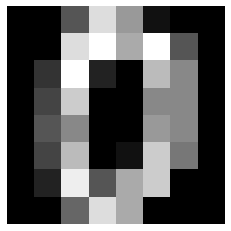

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

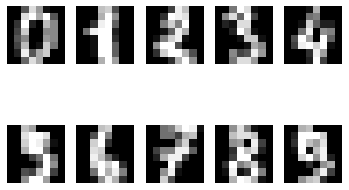

In [32]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray') 
    plt.axis('off') 
plt.show()

In [33]:
digits_label = digits.target
print(digits_label.shape)
digits_label[:20]

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [34]:
new_label = [3 if i == 3 else 0 for i in digits_label] 
new_label[:20]

[0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0]

In [35]:
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                    new_label,
                                                    test_size=0.2,
                                                    random_state=15)
decision_tree = DecisionTreeClassifier(random_state=15)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9388888888888889

In [36]:
fake_pred = [0] * len(y_pred)

accuracy = accuracy_score(y_test, fake_pred)
accuracy

0.925

In [37]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[320,  13],
       [  9,  18]])

In [38]:
confusion_matrix(y_test, fake_pred)

array([[333,   0],
       [ 27,   0]])

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       333
           3       0.58      0.67      0.62        27

    accuracy                           0.94       360
   macro avg       0.78      0.81      0.79       360
weighted avg       0.94      0.94      0.94       360



In [40]:
print(classification_report(y_test, fake_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       333
           3       0.00      0.00      0.00        27

    accuracy                           0.93       360
   macro avg       0.46      0.50      0.48       360
weighted avg       0.86      0.93      0.89       360



In [41]:
accuracy_score(y_test, y_pred), accuracy_score(y_test, fake_pred)

(0.9388888888888889, 0.925)

# 회고

### -. 데이터의 속성과 크기를 확인하여 분류하고 분류한 데이터로 모델학습을 통해 원하는 결과값을 도출하는 수업임.

### -. 각각의 데이터들 안에 컬럼과 수치가 제각각이었으나 데이터분류 및 모델학습을 통해 결과값을 도출해낼수 있음.

### -. 사이킷런을 통해 머신러닝 분석을 할때 유용하게 사용할 수 있는 라이브러리를 알게된 좋은 시간이었음.

### -. 각각의 많은 데이터들을 자세히 분류할수 있을거라는 확신이 들수 있는 프로젝트였음.

### -. 데이터 분류 이후 여러 모델들을 학습시켜 모델의 장단점을 알수 있음.

### -. 보다 유연하게 대량의 데이터를 쉽게 분류하여 최상의 결과값을 얻을 수 있는 시간이었음.

### -. cancer데이터에는 결측치가 포함되어 있어 결측치 해결 후에 모델학습과 평가를 하게 된다면 더 나은 머신러닝을 할수 있다고 생각됨

### -. label이 불균형하게 분포되어있는 데이터는 정확도만이 아닌 오차행렬의 값으로도 평가를 해봐야 좀 더 자세히 분석을 할수 있다는걸 알게 되었음.

### -. digits 데이터와 다르게 wine,cancer 데이터는 숫자 분류로 인해 모델학습 평가에서 오류가 있었음.
####     - 기존 digits 데이터는 0 ~ 10으로 이뤄진 숫자데이터였으나 wine데이터는 0 ~ 2로 이루어져있고, cancer데이터는 0 ~ 1로 이루어져 
####     오차행렬값이 하나의 데이터로 출력됨
####     new_label = [(1 or 2) if i == (1 or 2) else 0 for i in wine_label] 
####     new_label
####     이런식으로 변수의 함수 값을 변경하여 실행 후에 오차행렬값을 제대로 얻어내었음 

### -. 빅데이터와 관련된 내용을 조금이나마 알수 있었고, 머신러닝을 대입하여 그 데이터들의 분석과 모델학습을 통한 결과값에 대해 굉장히 흥미로웠던 프로젝트 시간이 아니었나 생각이 됨.